In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\Heart\Heart Disease.csv")

In [5]:
df.shape

(920, 17)

In [6]:
df.head()

,Unnamed: 0,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,BMI
0,0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,0,18
1,1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,2,29
2,2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,1,22
3,3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,0,20
4,4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,0,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   id          920 non-null    int64  
 2   age         920 non-null    int64  
 3   sex         920 non-null    object 
 4   dataset     920 non-null    object 
 5   cp          920 non-null    object 
 6   trestbps    861 non-null    float64
 7   chol        890 non-null    float64
 8   fbs         830 non-null    object 
 9   restecg     918 non-null    object 
 10  thalch      865 non-null    float64
 11  exang       865 non-null    object 
 12  oldpeak     858 non-null    float64
 13  slope       611 non-null    object 
 14  ca          309 non-null    float64
 15  num         920 non-null    int64  
 16  BMI         920 non-null    int64  
dtypes: float64(5), int64(5), object(7)
memory usage: 122.3+ KB


In [10]:
df.isnull().sum().sort_values(ascending=False)

ca            611
slope         309
fbs            90
oldpeak        62
trestbps       59
thalch         55
exang          55
chol           30
restecg         2
num             0
Unnamed: 0      0
id              0
cp              0
dataset         0
sex             0
age             0
BMI             0
dtype: int64

In [11]:
df['thalch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: thalch
Non-Null Count  Dtype  
--------------  -----  
865 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


In [12]:
df['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [13]:
df['oldpeak'].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [14]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [15]:
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [16]:
df['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [20]:
df['restecg'] = df['restecg'].apply(lambda x:0 if x=='normal' else( 1 if x=='lv hypertrophy' else 2) )

In [21]:
df['slope']= df['slope'].apply(lambda x:0 if x=='flat' else( 1 if x=='upsloping' else 2) )

In [22]:
df.drop(['id','dataset'],axis=1,inplace=True)

In [23]:
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,BMI
0,0,63,Male,typical angina,145.0,233.0,True,1,150.0,False,2.3,2,0.0,0,18
1,1,67,Male,asymptomatic,160.0,286.0,False,1,108.0,True,1.5,0,3.0,2,29
2,2,67,Male,asymptomatic,120.0,229.0,False,1,129.0,True,2.6,0,2.0,1,22
3,3,37,Male,non-anginal,130.0,250.0,False,0,187.0,False,3.5,2,0.0,0,20
4,4,41,Female,atypical angina,130.0,204.0,False,1,172.0,False,1.4,1,0.0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,asymptomatic,127.0,333.0,True,2,154.0,False,0.0,2,NaN,1,19
916,916,62,Male,typical angina,NaN,139.0,False,2,NaN,NaN,NaN,2,NaN,0,19
917,917,55,Male,asymptomatic,122.0,223.0,True,2,100.0,False,0.0,2,NaN,2,27
918,918,58,Male,asymptomatic,NaN,385.0,True,1,NaN,NaN,NaN,2,NaN,0,20


In [24]:
data = pd.DataFrame({
    "Age": df['age'],
    "trestbps": df['trestbps'],
    "chol": df['chol'],
    "thalch":df['thalch'],
    "oldpeak":df['oldpeak'],
    "slope":df['slope'],
    "ca":df['ca']
    
})


<Axes: >

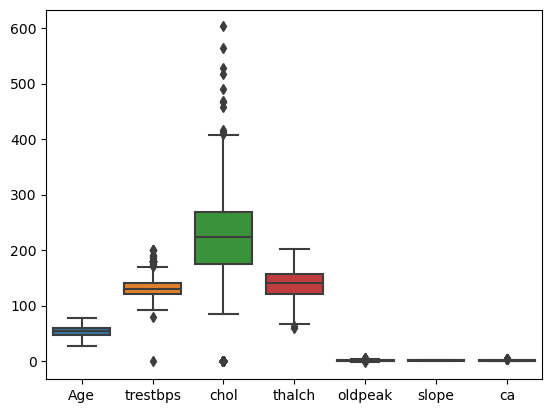

In [25]:
sns.boxplot(data=data)

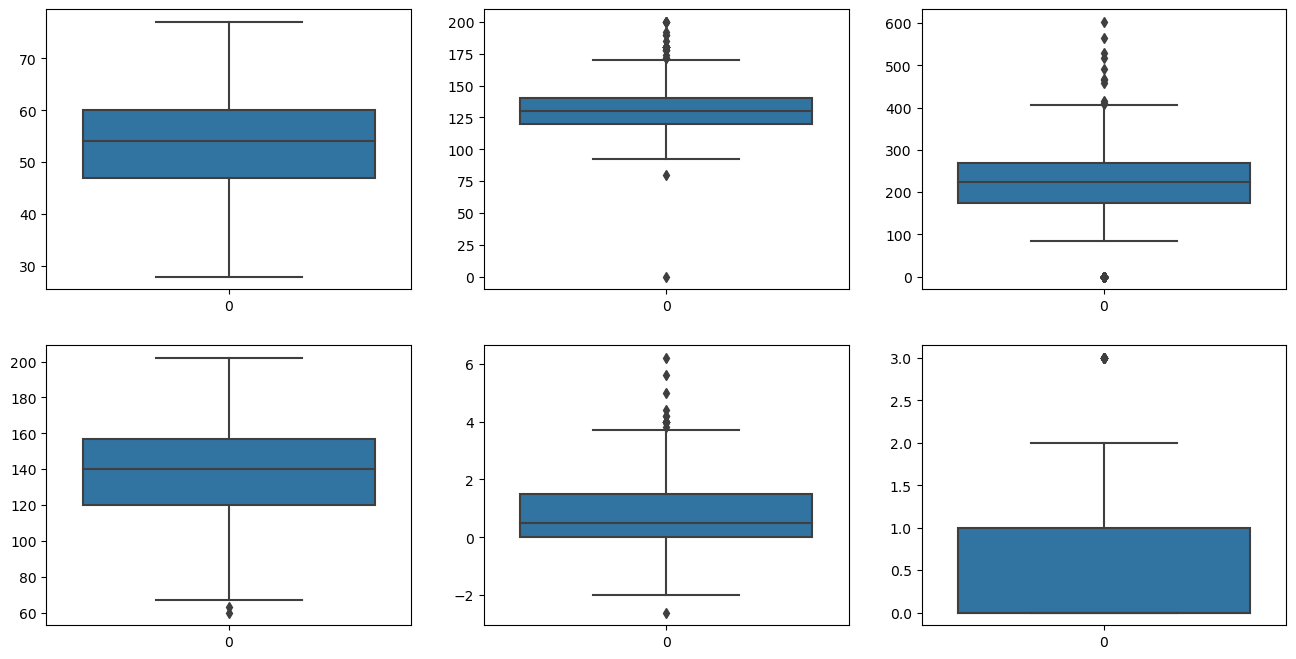

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['age'])

plt.subplot(2,3,2)
sns.boxplot(df['trestbps'])

plt.subplot(2,3,3)
sns.boxplot(df['chol'])

plt.subplot(2,3,4)
sns.boxplot(df['thalch'])

plt.subplot(2,3,5)
sns.boxplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.boxplot(df['ca'])


plt.show()

C:\Users\dsail\AppData\Local\Temp\ipykernel_4396\2861911815.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
C:\Users\dsail\AppData\Local\Temp\ipykernel_4396\2861911815.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'])
C:\Users\dsail\AppData\Local\Temp\ipykernel_4

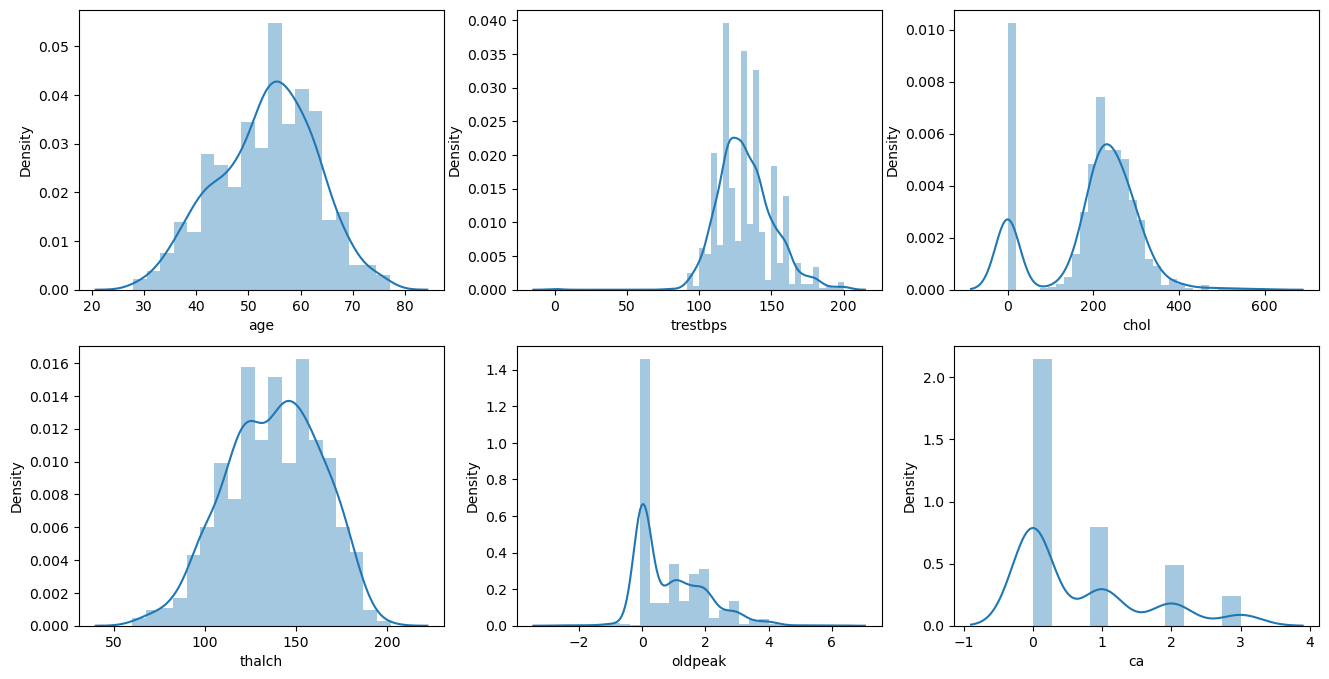

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.distplot(df['age'])

plt.subplot(2,3,2)
sns.distplot(df['trestbps'])

plt.subplot(2,3,3)
sns.distplot(df['chol'])

plt.subplot(2,3,4)
sns.distplot(df['thalch'])

plt.subplot(2,3,5)
sns.distplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.distplot(df['ca'])

# Show the plots
plt.show()

In [28]:
upperthalch = df['thalch'].mean()+3*df['thalch'].std()
upperthalch

215.3244942182772

In [29]:
lowerthalch = df['thalch'].mean() - 3 * df['thalch'].std()
lowerthalch

59.76683526149155

In [30]:
df[(df['thalch']>215.32) | (df['thalch']<5)]

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,BMI


In [31]:
df['age'].skew()

-0.195993861608106

In [32]:
df['trestbps'].skew()

0.21333446967212508

In [33]:
df['chol'].skew()

-0.6138360897370758

In [34]:
df['thalch'].skew()

-0.21111858073161133

In [35]:
df['oldpeak'].skew()

1.0414266146339854

In [36]:
df['ca'].skew()

1.1659778654172832

In [37]:
p25t = df['trestbps'].quantile(0.25)
p75t = df['trestbps'].quantile(0.75)
iqrt = p75t-p25t
uppert = p75t+iqrt
lowert = p25t-iqrt

In [38]:
uppert

160.0

In [39]:
lowert

100.0

In [40]:
df['trestbps'] = np.where(df['trestbps']>uppert,uppert,np.where(
df['trestbps']<lowert,lowert,df['trestbps']))

In [41]:
p25c = df['chol'].quantile(0.25)
p75c = df['chol'].quantile(0.75)
iqrc = p75c-p25c
upperc = p75c+iqrc
lowerc = p25c-iqrc

In [42]:
upperc

361.0

In [43]:
lowerc

82.0

In [44]:
df['chol'] = np.where(df['chol']>upperc,upperc,np.where(
df['chol']<lowerc,lowerc,df['chol']))

In [45]:
p25o = df['oldpeak'].quantile(0.25)
p75o = df['oldpeak'].quantile(0.75)
iqro = p75o-p25o
uppero = p75o+iqro
lowero = p25o-iqro

In [46]:
uppero

3.0

In [47]:
lowero

-1.5

In [48]:
df['oldpeak'] = np.where(df['oldpeak']>uppero,uppero,np.where(df['oldpeak']<lowero,lowero,df['oldpeak']))

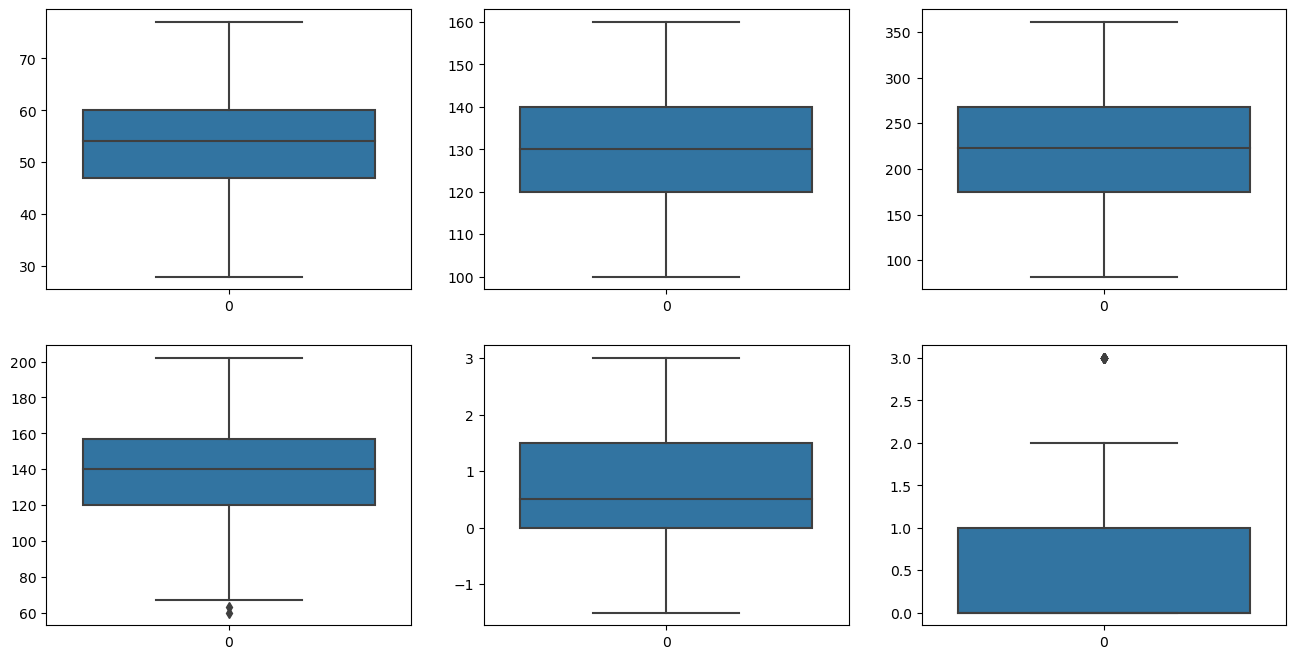

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['age'])

plt.subplot(2,3,2)
sns.boxplot(df['trestbps'])

plt.subplot(2,3,3)
sns.boxplot(df['chol'])

plt.subplot(2,3,4)
sns.boxplot(df['thalch'])

plt.subplot(2,3,5)
sns.boxplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.boxplot(df['ca'])

plt.show()

In [51]:
df.drop(columns=['Unnamed: 0'],inplace =True)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['num'],axis=1),df['num'])

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [74]:
trf2= ColumnTransformer(transformers = [
    ('impute_bps_Chol_thal_ch_oldPeak_ca',SimpleImputer(),[3,4,7,9,11]),
    ('impute_fbs_restecg_exang_slope',SimpleImputer(strategy='most_frequent'),[5,6,8,10]),
    ('oc',OrdinalEncoder(categories=[['asymptomatic','non-anginal','atypical angina','typical angina']]),[2]),
    ('oh_sex_fbs_exang',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,5,8]),
],remainder='passthrough')

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
trf3 = StandardScaler()

In [77]:
from sklearn.pipeline import make_pipeline

In [78]:
pipe = make_pipeline(trf2,trf3)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [80]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,100,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'knearestneighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,30]
        }
    },
    'naive_bayes':{
        'model':GaussianNB(),
        'params':{
            
        }
    }
}

In [81]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    X = pipe.fit_transform(X_train)
    clf.fit(X,Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scores

C:\Users\dsail\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\dsail\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\dsail\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\dsail\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse

,model,best_score,best_params
0,svm,0.795652,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.836232,{'n_estimators': 100}
2,logistic_regression,0.731884,{'C': 10}
3,knearestneighbors,0.615942,{'n_neighbors': 5}
4,naive_bayes,0.530435,{}


In [82]:
X = df.drop('num',axis=1)
y = df['num']
y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

In [83]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

In [84]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
    
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,2,3]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(penalty='l2'),
        'params': {
            
        }
    },
    'knearestneighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,30]
        }
    },
    'naive_bayes':{
        'model':GaussianNB(),
        'params':{
            
        }
    }
}

In [85]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    X = pipe.fit_transform(X_train)
    clf.fit(X,Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scores

C:\Users\dsail\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\dsail\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\dsail\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\dsail\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse

,model,best_score,best_params
0,svm,0.853623,{}
1,random_forest,0.863768,{'n_estimators': 3}
2,logistic_regression,0.886957,{}
3,knearestneighbors,0.839130,{'n_neighbors': 5}
4,naive_bayes,0.863768,{}


In [86]:
import joblib

In [87]:
trf5 = LogisticRegression()

In [88]:
last_pipe = make_pipeline(trf2,trf3,trf5)